In [1]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
df = pd.read_csv('./seattle-library-checkout-records/checkouts_total_sample_withou_inventory_join.csv')
print(len(df))

9537952


In [4]:
df.head()

,author,checkout_time,description,format_subgroup,publication_year,publisher,title,year
0,NaN,03/18/2006 02:41:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
1,NaN,03/21/2006 06:14:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
2,NaN,07/22/2006 10:44:00 AM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
3,NaN,09/27/2006 03:23:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
4,NaN,12/28/2006 03:44:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006


## number of checkouts over the years

### overall

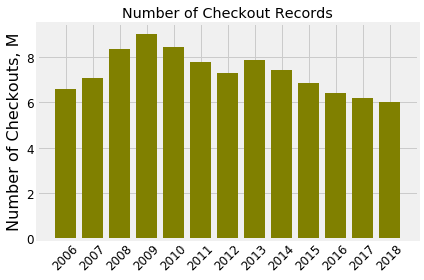

In [5]:
plt.bar(range(len(df['year'].unique())), df.groupby('year').size()/100000, color='#808000')
plt.xticks(range(len(df['year'].unique())), df['year'].unique(), rotation=45)
plt.ylabel('Number of Checkouts, M', fontsize = 16)
plt.tick_params(labelsize=12)
plt.title('Number of Checkout Records')
plt.tight_layout()
#plt.savefig('./images/number_of_checkouts_over_years.png',  dpi= 300, frameon = False)#, transparent = True)

### by item type

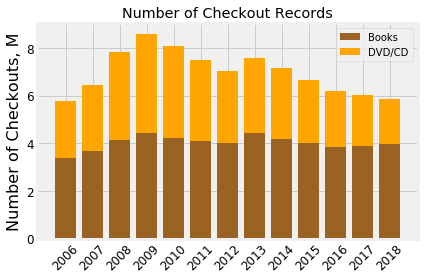

In [26]:
plt.bar(range(len(df[df['format_subgroup'].apply(lambda x: x in ['Book'])]['year'].unique())), df[df['format_subgroup'].apply(lambda x: x in ['Book'])].groupby('year').size()/100000, color='#9A6324', label = 'Books')
plt.bar(range(len(df[df['format_subgroup'].apply(lambda x: x in ['Video Disc','Audio Disc', 'Music Score'])]['year'].unique())), df[df['format_subgroup'].apply(lambda x: x in ['Video Disc','Audio Disc', 'Music Score'])].groupby('year').size()/100000, color='orange', bottom = df[df['format_subgroup'].apply(lambda x: x in ['Book'])].groupby('year').size()/100000, label ='DVD/CD')


plt.xticks(range(len(df['year'].unique())), df['year'].unique(), rotation=45)
plt.ylabel('Number of Checkouts, M', fontsize = 16)
plt.tick_params(labelsize=12)
plt.title('Number of Checkout Records')
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('./images/number_of_checkouts_over_years_by_type.png',  dpi= 300, frameon = False)#, transparent = True)

In [7]:
df.head()

,author,checkout_time,description,format_subgroup,publication_year,publisher,title,year
0,NaN,03/18/2006 02:41:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
1,NaN,03/21/2006 06:14:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
2,NaN,07/22/2006 10:44:00 AM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
3,NaN,09/27/2006 03:23:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006
4,NaN,12/28/2006 03:44:00 PM,CA8-Music CD,Audio Disc,NaN,NaN,NaN,2006


In [8]:
df['checkout_tmstp'] = df['checkout_time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

# Hour of Day

In [9]:
df['hour'] = df['checkout_tmstp'].apply(lambda x: x.hour)

In [10]:
def hod_dist(df, format_subgroup = None, year = None): ##hour of day distribution
    if format_subgroup is None and year is None:
        hod = pd.DataFrame({'num_checkouts': df.groupby('hour').size()})
        
    elif year is not None:
        hod = pd.DataFrame({'num_checkouts': df[df['year']==year].groupby('hour').size()})
        
    elif format_subgroup is not None:
        hod =  pd.DataFrame({'num_checkouts': df[df['format_subgroup'].apply(lambda x: x in format_subgroup)].groupby('hour').size()})
        
    else:
        print('Error')
        
    hod.reset_index(inplace = True)
    hod.sort_values(by='hour', inplace = True, ascending = True)
    hod['num_checkout_pct'] = hod['num_checkouts']/sum(hod['num_checkouts'])*100
    hod = hod[hod['hour']>=8][hod['hour']<=20]
    hod.reset_index(inplace = True)
    return hod

## overall

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


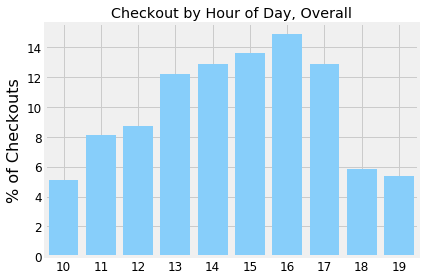

In [11]:
plt.title('Checkout by Hour of Day, Overall')

plt.bar(range(8,21), hod_dist(df)['num_checkout_pct'], label='Total', color='lightskyblue')
plt.xticks(range(8,21), range(8,21))

plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)
plt.xlim((9.5, 19.5))
plt.tight_layout()
plt.savefig('./images/hour_of_day_overall.png',  dpi= 300, frameon = False)#, transparent = True)

## broken down by subtype

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


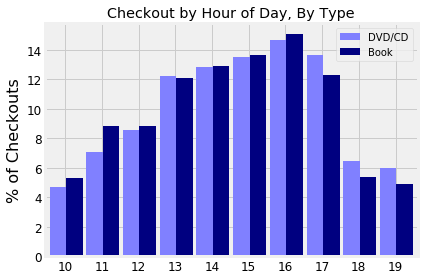

In [12]:
width = 0.45

plt.title('Checkout by Hour of Day, By Type')

plt.bar(range(8,21), hod_dist(df, format_subgroup=['Video Disc','Audio Disc', 'Music Score'])['num_checkout_pct'], width=width, label = 'DVD/CD', color=lighten_color('b',0.5))
plt.bar([x+width for x in range(8,21)], hod_dist(df,format_subgroup=['Book'])['num_checkout_pct'], width=width, label='Book', color = lighten_color('b', 1.5))

plt.xticks([x+0.2 for x in range(8,21)], range(8,21))
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)
plt.xlim((9.65, 19.8))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./images/hour_of_day_by_type.png',  dpi= 300, frameon = False)#, transparent = True)

## over the years

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


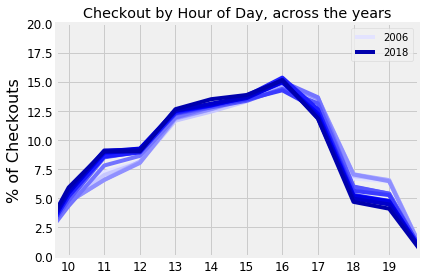

In [13]:
count = 1
plt.title('Checkout by Hour of Day, across the years')

year=2006
year_2006,= plt.plot(range(8,21), hod_dist(df,year=year)['num_checkout_pct'], color=lighten_color('b',0.11*count), label = year)
count = count+1

for year in range(2007,2017):
    plt.plot(range(8,21), hod_dist(df,year=year)['num_checkout_pct'], color=lighten_color('b',0.11*count))
    count+=1

year=2018
year_2018, = plt.plot(range(8,21), hod_dist(df,year=year)['num_checkout_pct'], color=lighten_color('b',0.11*count), label = year)
count= count+1
    
    
    
plt.xticks(range(8,21), range(8,21))
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)
plt.xlim((9.65, 19.8))
plt.legend([year_2006, year_2018], ['2006', '2018'], loc='best')
plt.ylim((0,20))
plt.tight_layout()
plt.savefig('./images/hour_of_day_by_year.png',  dpi= 300, frameon = False)#, transparent = True)

# Day of Week

In [14]:
def week_of_day(dow):
    doweek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    return doweek[dow]

In [15]:
df['dow'] = df['checkout_tmstp'].apply(lambda x: x.weekday())
df['dow_name'] = df['dow'].apply(lambda x: week_of_day(x))

In [16]:
def dow_dist(df, format_subgroup=None, year = None):
    if format_subgroup is None and year is None:
        dow = pd.DataFrame({'num_checkouts': df.groupby('dow_name').size(),\
                             'dow': df.groupby('dow_name')['dow'].max() })
    elif year is not None:
        dow = pd.DataFrame({'num_checkouts': df[df['year']==year].groupby('dow_name').size(),\
                             'dow': df[df['year']==year].groupby('dow_name')['dow'].max() })
        
    elif format_subgroup is not None:
        dow = pd.DataFrame({'num_checkouts': df[df['format_subgroup'].apply(lambda x: x in format_subgroup)].groupby('dow_name').size(),\
                             'dow': df[df['format_subgroup'].apply(lambda x: x in format_subgroup)].groupby('dow_name')['dow'].max() })
        
    else:
        print('Error')
        
    dow.reset_index(inplace = True)
    dow.sort_values(by='dow', inplace = True, ascending = True)
    dow['num_checkout_pct'] = dow['num_checkouts']/sum(dow['num_checkouts'])*100
    return dow

## overall

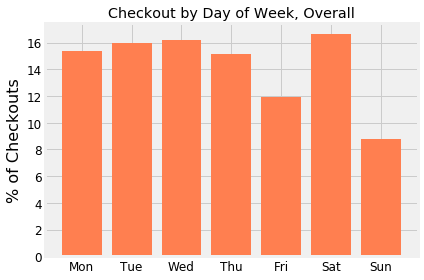

In [17]:
plt.title('Checkout by Day of Week, Overall')

plt.bar(range(7), dow_dist(df)['num_checkout_pct'], color='coral')

plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)
#plt.xlim((9.5, 19.5))
plt.tight_layout()
plt.savefig('./images/day_of_week_overall.png',  dpi= 300, frameon = False)#, transparent = True)

## by group type

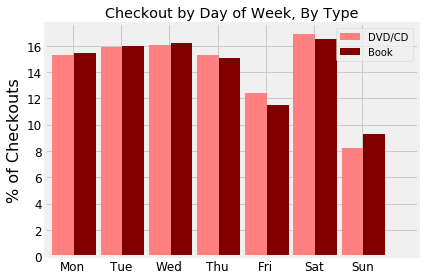

In [18]:
width = 0.45

plt.title('Checkout by Day of Week, By Type')

plt.bar(range(7), dow_dist(df, format_subgroup=['Video Disc','Audio Disc', 'Music Score'])['num_checkout_pct'], width=width, label = 'DVD/CD', color=lighten_color('r',0.5))
plt.bar([x+width for x in range(7)], dow_dist(df,format_subgroup=['Book'])['num_checkout_pct'], width=width, label='Book', color=lighten_color('r',1.5))


plt.xticks([x+0.2 for x in range(7)],  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)

plt.xlim((-0.38,7.35))

plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./images/day_of_week_by_type.png',  dpi= 300, frameon = False)#, transparent = True)

## by year

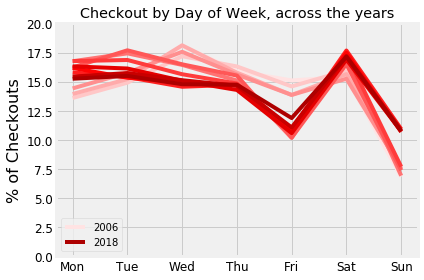

In [19]:
count = 1
plt.title('Checkout by Day of Week, across the years')

year=2006
year_2006,= plt.plot(range(7), list(dow_dist(df,year=year)['num_checkout_pct']), color=lighten_color('r',0.11*count), label = year)
count = count+1

for year in range(2007,2017):
    plt.plot(range(7), list(dow_dist(df,year=year)['num_checkout_pct']), color=lighten_color('r',0.11*count))
    count+=1

year=2018
year_2018, = plt.plot(range(7), list(dow_dist(df,year=year)['num_checkout_pct']), color=lighten_color('r',0.11*count), label = year)
count= count+1
    
plt.xticks([x+0 for x in range(7)],  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)

plt.legend([year_2006, year_2018], ['2006', '2018'], loc='best')
plt.ylim((0,20))
plt.tight_layout()
plt.savefig('./images/day_of_week_by_year.png',  dpi= 300, frameon = False)#, transparent = True)

# month of the year

In [20]:
df['month'] = df['checkout_tmstp'].apply(lambda x: x.month)

In [21]:
def moy_dist(df, format_subgroup = None, year = None): ##hour of day distribution
    if format_subgroup is None and year is None:
        hod = pd.DataFrame({'num_checkouts': df.groupby('month').size()})
        
    elif year is not None:
        hod = pd.DataFrame({'num_checkouts': df[df['year']==year].groupby('month').size()})
        
    elif format_subgroup is not None:
        hod =  pd.DataFrame({'num_checkouts': df[df['format_subgroup'].apply(lambda x: x in format_subgroup)].groupby('month').size()})
        
    else:
        print('Error')
        
    hod.reset_index(inplace = True)
    hod.sort_values(by='month', inplace = True, ascending = True)
    hod['num_checkout_pct'] = hod['num_checkouts']/sum(hod['num_checkouts'])*100
    hod.reset_index(inplace = True)
    return hod

## overall

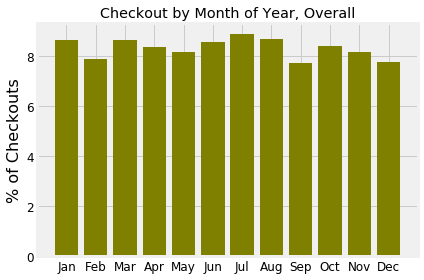

In [22]:
plt.title('Checkout by Month of Year, Overall')

plt.bar(range(12), moy_dist(df)['num_checkout_pct'], color='olive')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)
#plt.xlim((9.5, 19.5))
plt.tight_layout()
plt.savefig('./images/month_of_year_overall.png',  dpi= 300, frameon = False)#, transparent = True)

## by type

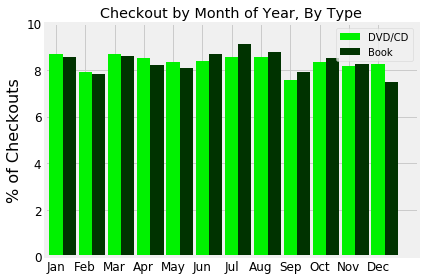

In [23]:
width = 0.45
plt.title('Checkout by Month of Year, By Type')

plt.bar(range(12), moy_dist(df, format_subgroup=['Video Disc','Audio Disc', 'Music Score'])['num_checkout_pct'], width=width, label = 'DVD/CD', color=lighten_color('g',0.7))
plt.bar([x+width for x in range(12)], moy_dist(df,format_subgroup=['Book'])['num_checkout_pct'], width=width, label='Book', color=lighten_color('g', 1.2))


plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)

plt.xlim((-0.38, 12.35))
plt.ylim((0,10))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./images/month_of_year_by_type.png',  dpi= 300, frameon = False)#, transparent = True)

## across the years

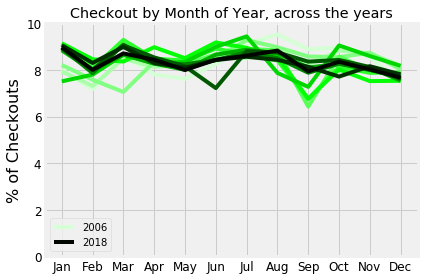

In [25]:
count = 1
plt.title('Checkout by Month of Year, across the years')

year=2006
year_2006,= plt.plot(range(12), list(moy_dist(df,year=year)['num_checkout_pct']), color=lighten_color('g',0.11*count), label = year)
count = count+1

for year in range(2007,2017):
    plt.plot(range(12), list(moy_dist(df,year=year)['num_checkout_pct']), color=lighten_color('g',0.11*count))
    count+=1

year=2018
year_2018, = plt.plot(range(12), list(moy_dist(df,year=year)['num_checkout_pct']), color=lighten_color('g',0.11*count), label = year)
count= count+1

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tick_params(labelsize = 12)
plt.ylabel('% of Checkouts', fontsize = 16)
plt.ylim((0,10))
plt.legend([year_2006, year_2018], ['2006', '2018'], loc='best')
plt.tight_layout()
plt.savefig('./images/month_of_year_by_year.png',  dpi= 300, frameon = False)#, transparent = True)